In [2]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import random
from numpy import square, sqrt
from sklearn.cluster import DBSCAN
%matplotlib inline
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/xclara.csv")
x = df.iloc[:,0].tolist()
y = df.iloc[:,1].tolist()

In [4]:
print("\nSample of feature vector points:")
points = list(zip(x, y))
points[:5]
points_x = [i[0] for i in points]
points_y = [i[1] for i in points]


Sample of feature vector points:


In [5]:
def OurDBSCAN(Dataset, eps, MinPts, Metric = "Euclidean", Noise = "Yes"):
    noise = [] #Variable to hold noise points
    visited = [] #List to hold points that have been visited
    Clusters = [] #List to hold all the clusters
    

    #Go through all the points in the dataset individually
    for point in Dataset: 
        
        #Check to see if the selected point has already been visited, if so continue
        if point in visited:
            continue
        
        #Find the neighbourhood points of the selected point
        neighbour_points = RangeQuery(Dataset,point,eps, Metric)
        
        #Check to see if the amount of point sin neighbourhood is > MinPts, if so then
        #mark the point as noise and continue, else expand Cluster
        if len(neighbour_points) < MinPts:
            noise.append(point)
            continue
            
        else:
            Clusters,visited,noise = ExpandCluster(Dataset, point, visited, noise, Clusters, neighbour_points, eps, MinPts)
            
    #add cluster values to scatterplot
    for cluster in Clusters:
        plt.scatter([i[0] for i in cluster],[i[1] for i in cluster],cmap="prism")
    
    
    #Add noise points if "yes", noise points are added in black  
    if Noise.lower() == "yes":
        plt.scatter([i[0] for i in noise],[i[1] for i in noise],color = "black")
        plt.title("Our DBSCAN")
        plt.show()
    elif Noise.lower() == "no":
        plt.title("Our DBSCAN")
        plt.show()
    else:
        sys.exit("Error: Pass in either \"Yes\" or \"No\" for noise.")
    
    return Clusters
    
    
#-------------------------------
#ExpandCluster Function
#-------------------------------       
def ExpandCluster(Dataset, Point, visited, noise, Clusters, neighbour_points, eps, MinPts):
    temp_Cluster = [] #This list variable will hold all our points for the cluster
    temp_Cluster.append(Point)

    #Go through all the points in the neighbourhood
    for neighbour_point in neighbour_points:  
        if neighbour_point not in visited:
            if neighbour_point in noise:                 
                #Remove point from noise
                noise.remove(neighbour_point)
            visited.append(neighbour_point)
            next_neighbour_points = RangeQuery(Dataset,neighbour_point,MinPts, Metric = "Euclidean")
            if len(next_neighbour_points) >= MinPts:
                for i in next_neighbour_points:
                    neighbour_points.append(i)

            #Will append neighbour_point to the cluster if it's not in any other cluster        
            in_cluster = 0
            for clust in Clusters:
                if neighbour_point in clust:
                    in_cluster = 1
                    break
            if in_cluster is 0:
                temp_Cluster.append(neighbour_point)
                

    Clusters.append(temp_Cluster)       
    return Clusters, visited, noise       
    
    
    
    
#-------------------------------
#RangeQuery Function
#-------------------------------
def RangeQuery(Dataset, CorePoint, eps, Metric):
    neighbour_points = []  #Variable to hold all neighbour points of core point
    
    #Go through all the points
    for point in Dataset:
        
        if Metric.lower() == "euclidean":
            
            #Use euclidean distance formula to check distance between points
            dist = sqrt(((CorePoint[0]-point[0])**2)+((CorePoint[1]-point[1])**2))
            
        elif Metric.lower() == "manhattan":
            
            #Use manhattan distance formula to check distance between poin
            dist = (abs(CorePoint[0] - point[0])) + (abs(CorePoint[1] - point[1]))
            
        else:
            
            #Error
            sys.exit("Error: Pass in either \"Euclidean\" or \"Manhattan\" for noise.")
            
            
        #if less then or equal to eps, then point is a neighbour
        if dist <= eps:
            neighbour_points.append(point)
    
    #return the list of neighbour points
    return neighbour_points

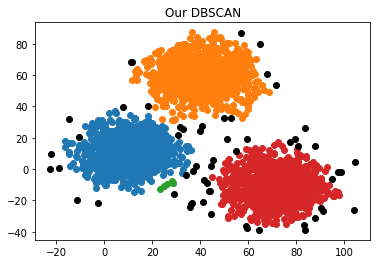

In [6]:
cluster1 = OurDBSCAN(points, 4, 4, Metric = "Euclidean", Noise = "Yes")

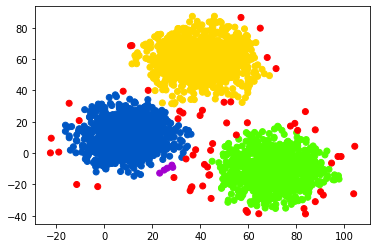

In [7]:
db = DBSCAN(eps = 4 , min_samples = 4 , metric='euclidean').fit(points)
core_samples = db.core_sample_indices_
labels = db.labels_
cluster2 = len(set(labels)) - (1 if -1 in labels else 0)
plt.scatter(points_x, points_y, c=labels, cmap='prism')
plt.show()

In [8]:
print("# of clusters in Our DBSCAN:")
print(len(cluster1))
print("")
print("# of clusters in sklearn's DBSCAN:")
print(cluster2)

# of clusters in Our DBSCAN:
4

# of clusters in sklearn's DBSCAN:
4
